# Absolute and relative cavity entry phases

There are three ways to define the phase of a cavity: by its relative entry phase $\phi_{0,\,\mathrm{rel}}$, its absolute entry phase $\phi_{0,\,\mathrm{abs}}$ or its synchronous phase $\phi_s$ (still under implementation).

The relation between relative and entry phases is:
\begin{equation}
E_0\cos{\phi_{0,\,\mathrm{abs}}} = E_0\cos{(\phi_{0,\,\mathrm{rel}} + \phi_\mathrm{in})}
\end{equation}
where $\phi_\mathrm{in}$ is the phase at which the synchronous particle enters the cavity, $E_0$ is the amplitude of the electric field.

## Preparation

### Load libraries

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt

import config_manager
from beam_calculation.beam_calculator import BeamCalculator
from beam_calculation.factory import BeamCalculatorsFactory
from beam_calculation.simulation_output.simulation_output import SimulationOutput
from core.accelerator.accelerator import Accelerator
from core.accelerator.factory import NoFault, WithFaults
from failures.fault_scenario import FaultScenario, fault_scenario_factory
from visualization import plot

plt.rcParams["figure.figsize"] = (15, 5)

### Set configuration dicts

In [2]:
LW_DIR = Path("..", "..", "..", "..").absolute().resolve()
DATA_DIR = LW_DIR / "data" / "example"
OUT_DIR = DATA_DIR / "results"
CONFIG_PATH = DATA_DIR / "lightwin.toml"
CONFIG_KEYS = {
    'files': 'files',
    'beam_calculator': 'generic_envelope1d',
    'beam': 'beam',
    'plots': 'plots_minimal',
    'wtf': 'generic_wtf',
    'design_space': 'generic_design_space',
}

override = {'beam_calculator': {'flag_phi_abs': True}, 'plots': {'energy': False}}
config_abs = config_manager.process_config(CONFIG_PATH, CONFIG_KEYS, warn_mismatch=True, override=override)
plots_phase = config_abs['plots']

[INFO    ] [files.py            ] Setting project_path = PosixPath('/home/placais/LightWin/data/example/results_tests')
Setting log_file = PosixPath('/home/placais/LightWin/data/example/results_tests/lightwin.log')
[INFO    ] [config_manager.py   ] Config dict files successfully tested. After potential  modifications, it looks like:
                                            dat_file = /home/placais/LightWin/data/example/example.dat
                                      project_folder = /home/placais/LightWin/data/example/results_tests
[INFO    ] [config_manager.py   ] Config dict beam_calculator successfully tested. After potential  modifications, it looks like:
                                                tool = Envelope1D
                                        flag_phi_abs = True
                                         flag_cython = True
                                    n_steps_per_cell = 40
                                              method = RK
[INFO    ] [config_manage

In [3]:
override = {
    'beam_calculator':
        {
            'flag_phi_abs': False
        },
    'plots': {
        'cav': True
    },
    'wtf': {
        'objective_preset': 'rephased_ADS',
    }
}
config_rel = config_manager.process_config(CONFIG_PATH, CONFIG_KEYS, warn_mismatch=True, override=override)
plots_complete = config_rel['plots']

[INFO    ] [files.py            ] Setting project_path = PosixPath('/home/placais/LightWin/data/example/results_tests')
Setting log_file = PosixPath('/home/placais/LightWin/data/example/results_tests/lightwin.log')
[INFO    ] [config_manager.py   ] Config dict files successfully tested. After potential  modifications, it looks like:
                                            dat_file = /home/placais/LightWin/data/example/example.dat
                                      project_folder = /home/placais/LightWin/data/example/results_tests
[INFO    ] [config_manager.py   ] Config dict beam_calculator successfully tested. After potential  modifications, it looks like:
                                                tool = Envelope1D
                                        flag_phi_abs = False
                                         flag_cython = True
                                    n_steps_per_cell = 40
                                              method = RK
[INFO    ] [config_manag

### Set BeamCalculator objects

In [4]:
factory = BeamCalculatorsFactory(beam_calculator=config_abs['beam_calculator'],
                                 files=config_abs['files'])
solver_abs = factory.run_all()[0]

factory = BeamCalculatorsFactory(beam_calculator=config_rel['beam_calculator'],
                                 files=config_rel['files'])
solver_rel = factory.run_all()[0]

### Set Accelerator objects

In [5]:
factory = WithFaults(beam_calculators=solver_abs, **config_abs['files'], **config_abs['wtf'])
accelerators_abs = factory.run_all()
for acc in accelerators_abs:
    acc.name += r' (absolute $\phi_0$)'
working_abs = accelerators_abs[0]
broken_abs = accelerators_abs[1]

factory = WithFaults(beam_calculators=solver_rel, **config_rel['files'], **config_rel['wtf'])
accelerators_rel = factory.run_all()
for acc in accelerators_rel:
    acc.name += r' (relative $\phi_0$)'
working_rel = accelerators_rel[0]
broken_rel = accelerators_rel[1]

working = (working_abs, working_rel)
broken = (broken_abs, broken_rel)

[INFO    ] [factory.py          ] First initialisation of ListOfElements, ecompassing all linac. Created with dat_file = PosixPath('/home/placais/LightWin/data/example/example.dat')
[INFO    ] [list_of_elements.py ] Successfully created a ListOfElements with self.w_kin_in = 20.0 MeV and self.phi_abs_in = 0.0 rad.
[WARNING ] [factory.py          ] You asked LW a simulation in absolute phase, while there is at least one cavity in relative phase in the .dat file used by TW. You can expect a phase difference between LightWin results and TraceWin results for the same input .dat, after the first failed cavity. No difference should appear with the output .dat, or when using TraceWin solver within LightWin.
[INFO    ] [factory.py          ] First initialisation of ListOfElements, ecompassing all linac. Created with dat_file = PosixPath('/home/placais/LightWin/data/example/example.dat')
[INFO    ] [list_of_elements.py ] Successfully created a ListOfElements with self.w_kin_in = 20.0 MeV and sel

## Propagate the beam

### Nominal linac

[WARNING ] [simulation_output.py] data_in_tw_fashion is bugged
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000000_ref/0_Envelope1D/example.dat.
[INFO    ] [beam_calculator.py  ] Elapsed time in beam calculation: 0:00:00.480093
[WARNING ] [simulation_output.py] data_in_tw_fashion is bugged
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000000_ref/0_Envelope1D/example.dat.
[INFO    ] [beam_calculator.py  ] Elapsed time in beam calculation: 0:00:00.474856


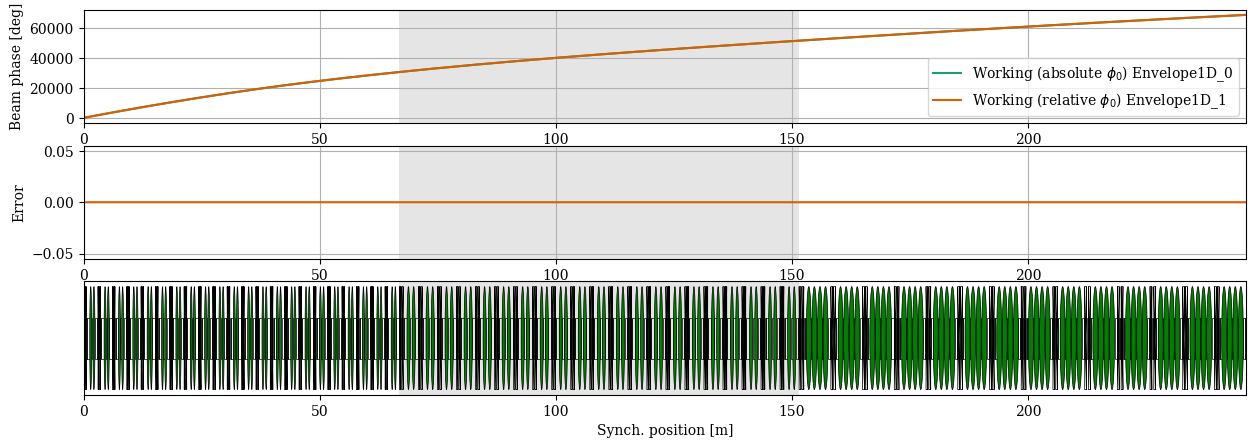

In [6]:
_ = solver_abs.compute(working_abs)
_ = solver_rel.compute(working_rel)
figs = plot.factory(working, plots_phase, save_fig=False, clean_fig=False)

<div class="alert alert-info">
The reference $\phi_0$ that is used is the one defined in the `.dat`.
As a matter of a fact, we need to propagate the beam a first time to know the entry phase of the synchronous particle in every cavity.
This quantity is necessary to link $\phi_{0,\,\mathrm{abs}}$ with $\phi_{0,\,\mathrm{rel}}$.
</div>

## Linac with one broken cavity

In [7]:
fault_scenarios_abs = fault_scenario_factory(accelerators_abs, solver_abs, config_abs['wtf'], config_abs['design_space'])

[INFO    ] [factory.py          ] Created variables:
Variable                  | Element         | x_0      | Lower lim | Upper lim
----------------------------------------------------------------------------------------------------
$\phi_{0, abs}$ [deg]     | ELT9            |  272.279 |  -360.000 |   360.000
$\phi_{0, abs}$ [deg]     | ELT10           |   55.649 |  -360.000 |   360.000
$\phi_{0, abs}$ [deg]     | ELT12           |  101.288 |  -360.000 |   360.000
$k_e$ [1]                 | ELT9            |    1.649 |     1.319 |     4.756
$k_e$ [1]                 | ELT10           |    1.649 |     1.319 |     4.756
$k_e$ [1]                 | ELT12           |    1.698 |     1.359 |     4.756
Created constraints:

Constraint                | Element         | x_0      | Lower lim | Upper lim
----------------------------------------------------------------------------------------------------
[INFO    ] [factory.py          ] Created objectives:
                        What, where, 

In [8]:
fault_scenarios_rel = fault_scenario_factory(accelerators_rel, solver_rel, config_rel['wtf'], config_rel['design_space'])

[INFO    ] [factory.py          ] Created variables:
Variable                  | Element         | x_0      | Lower lim | Upper lim
----------------------------------------------------------------------------------------------------
$\phi_{0, abs}$ [deg]     | ELT9            |  272.279 |  -360.000 |   360.000
$\phi_{0, abs}$ [deg]     | ELT10           |   55.649 |  -360.000 |   360.000
$\phi_{0, abs}$ [deg]     | ELT12           |  101.288 |  -360.000 |   360.000
$k_e$ [1]                 | ELT9            |    1.649 |     1.319 |     4.756
$k_e$ [1]                 | ELT10           |    1.649 |     1.319 |     4.756
$k_e$ [1]                 | ELT12           |    1.698 |     1.359 |     4.756
Created constraints:

Constraint                | Element         | x_0      | Lower lim | Upper lim
----------------------------------------------------------------------------------------------------
[INFO    ] [factory.py          ] Created objectives:
                        What, where, 

[WARNING ] [simulation_output.py] data_in_tw_fashion is bugged
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000001/0_Envelope1D/example.dat.
[INFO    ] [beam_calculator.py  ] Elapsed time in beam calculation: 0:00:00.547165


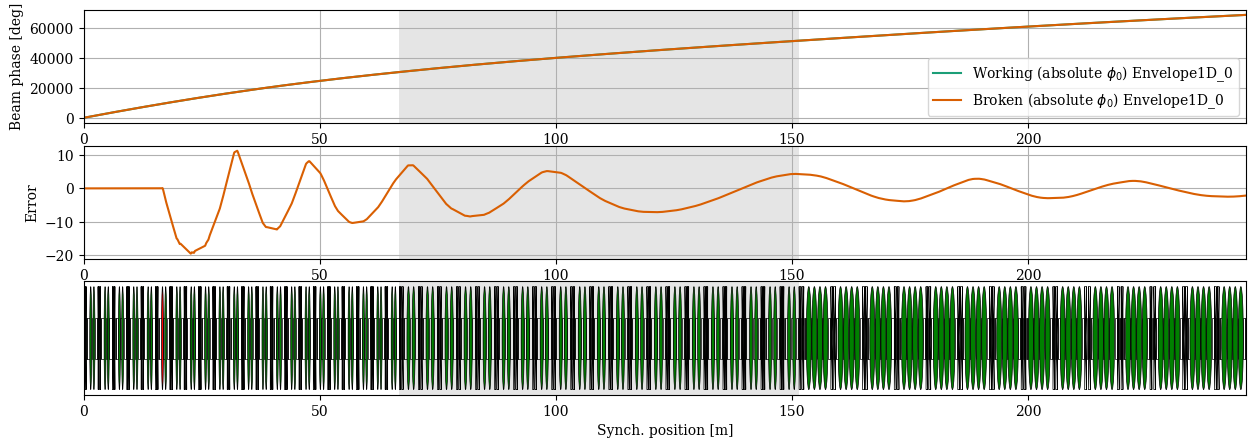

In [9]:
_ = solver_abs.compute(broken_abs)
figs = plot.factory(accelerators_abs, plots_phase, save_fig=False, clean_fig=False)

[WARNING ] [simulation_output.py] data_in_tw_fashion is bugged
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000001/0_Envelope1D/example.dat.
[INFO    ] [beam_calculator.py  ] Elapsed time in beam calculation: 0:00:00.482832


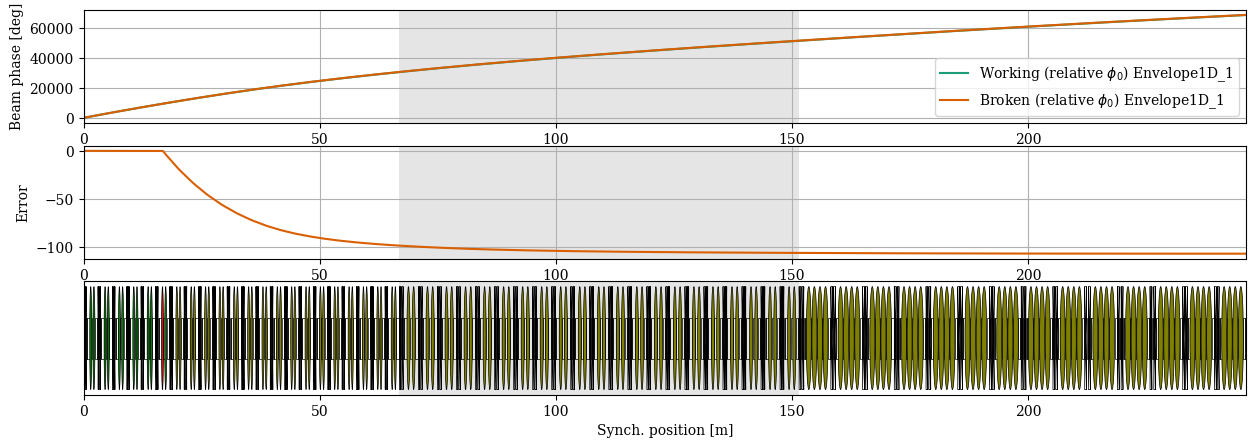

In [10]:
_ = solver_rel.compute(broken_rel)
figs = plot.factory(accelerators_rel, plots_phase, save_fig=False, clean_fig=False)

<div class="alert alert-info">
    After a cavity failure, the definition of the reference $\phi_0$ becomes important.
    With $\phi_\mathrm{ref} = \phi_{0,\,\mathrm{abs}}$, the cavities after the failure keep their absolute entry phase.
    With $\phi_\mathrm{ref} = \phi_{0,\,\mathrm{rel}}$, the cavities after the failure (olive color) are rephased, so that they keep their relative entry phase.
</div>

## Fixing the fault

In the absolute phase calculation, it is mandatory to retrieve the nominal energy and the nominal phase of the beam at the exit of the compensation zone.
In the relative phase calculation, the phase no longer needs to be retrieved, as the integrity of the linac after the failure is rephased.

Optimization terminated successfully.
         Current function value: 0.000010
         Iterations: 237
         Function evaluations: 405
[INFO    ] [downhill_simplex.py ] Objective functions results:
0:                                     | 3.525559733930095e-06
1:                                     | 2.8023950449096446e-06
2:                                     | 8.57189652547774e-06
Norm: 9.682995376883164e-06
[WARNING ] [simulation_output.py] data_in_tw_fashion is bugged
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000001/0_Envelope1D/example.dat.
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000001/tmp/tmp.dat.
[INFO    ] [debug.py            ] Fixed (1 of 1)
----------------------------------------------------------------------------------------------------
    name           status       k_e phi_0_abs phi_0_rel  v_cav_mv     phi_s
1   ELT9  compensate (ok)  1.396623 

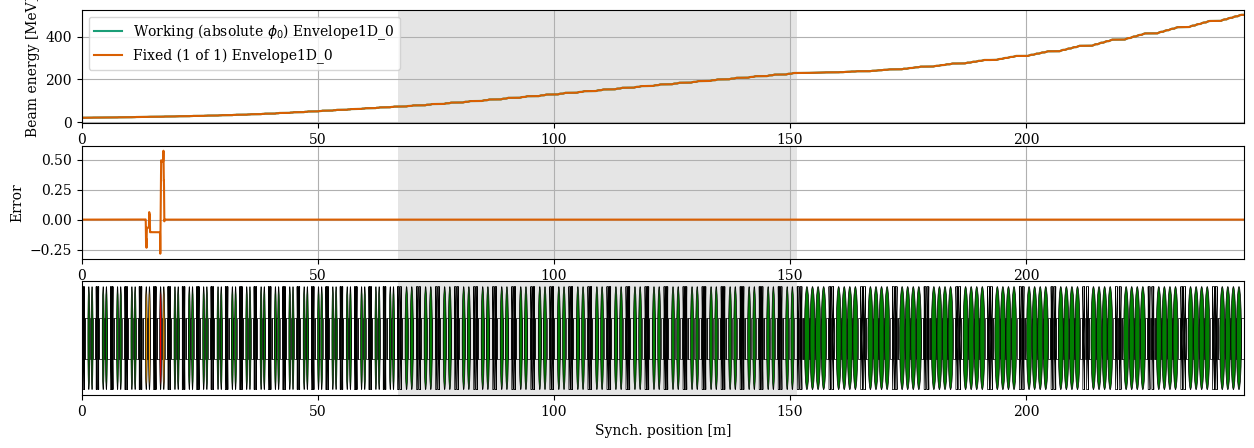

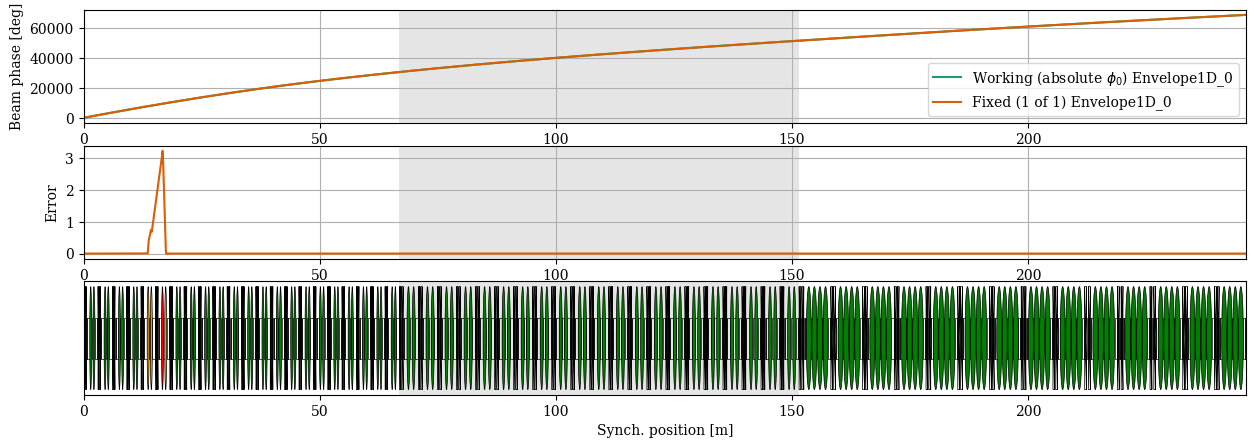

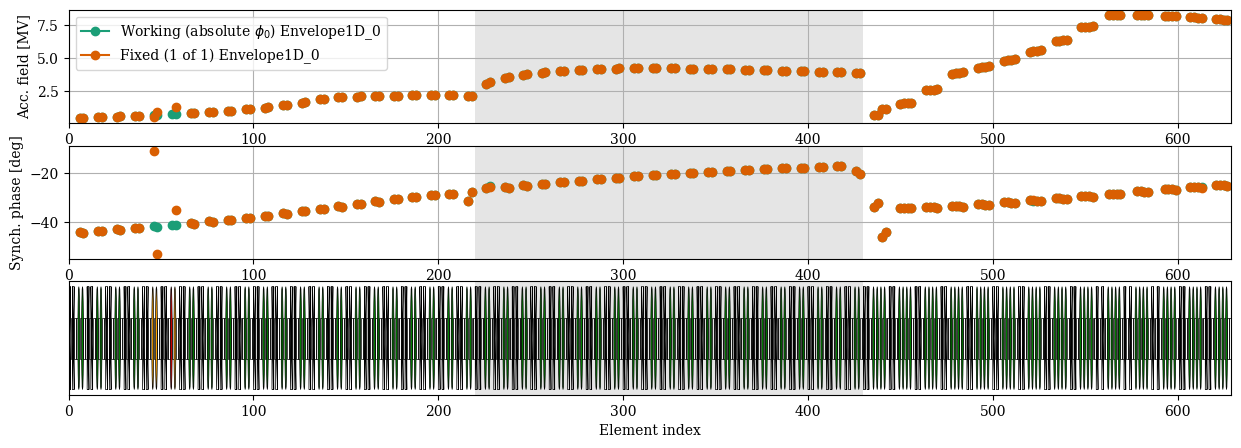

In [11]:
for scenario in fault_scenarios_abs:
    scenario.fix_all()
figs = plot.factory(accelerators_abs, plots_complete, save_fig=False, clean_fig=False)

Optimization terminated successfully.
         Current function value: 0.000014
         Iterations: 194
         Function evaluations: 347
[INFO    ] [downhill_simplex.py ] Objective functions results:
0:                                     | -3.0456890556251892e-06
1:                                     | 1.3755448432961614e-05
Norm: 1.408859763835355e-05
[WARNING ] [simulation_output.py] data_in_tw_fashion is bugged
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000001/0_Envelope1D/example.dat.
[INFO    ] [dat_files.py        ] New dat saved in /home/placais/LightWin/data/example/results_tests/000001/tmp/tmp.dat.
[WARNING ] [fault_scenario.py   ] Changed the way of defining idx1 and idx2.
[CRITICAL] [fault_scenario.py   ] Calculation in relative phase. Check if necessary to reperform simulation?
[INFO    ] [debug.py            ] Fixed (1 of 1)
---------------------------------------------------------------------------------------

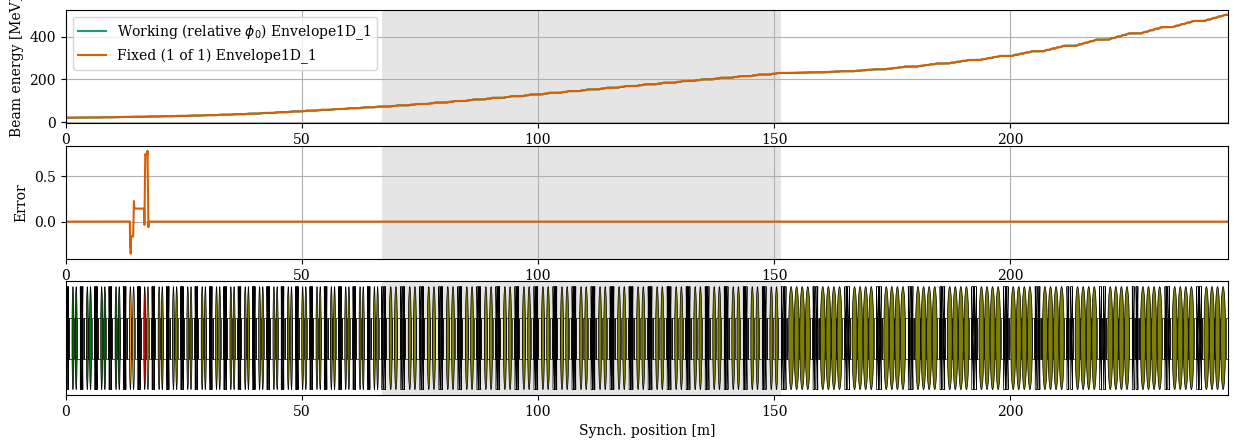

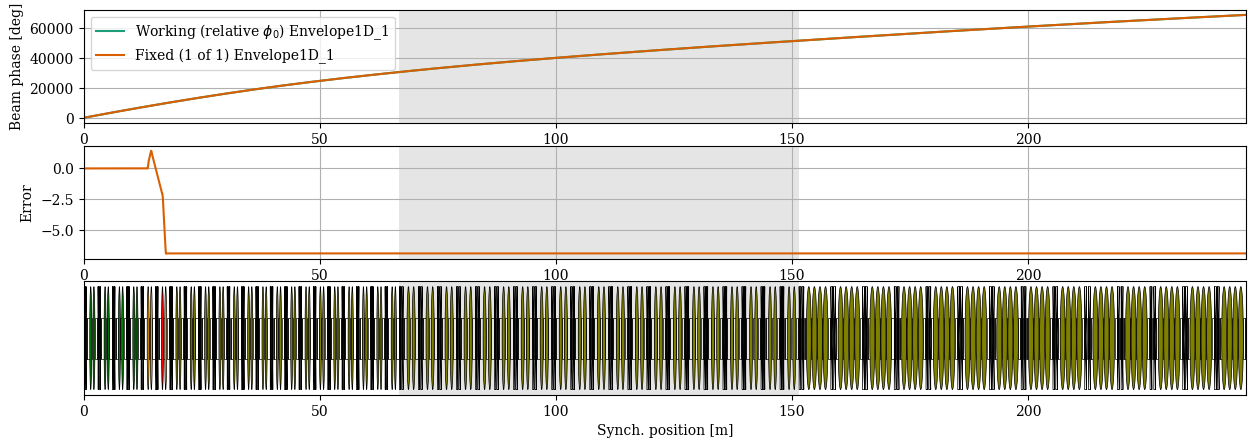

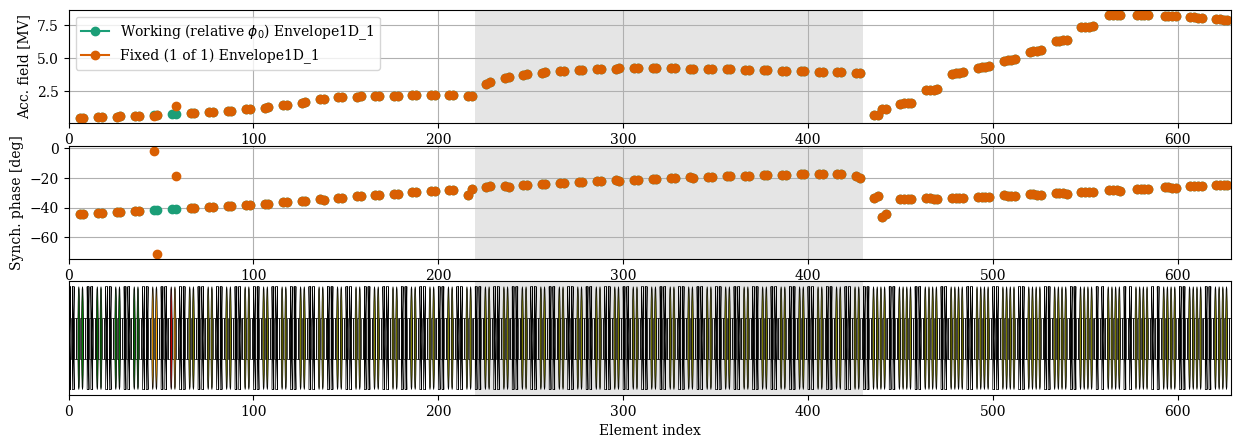

In [12]:
for scenario in fault_scenarios_rel:
    scenario.fix_all()
figs = plot.factory(accelerators_rel, plots_complete, save_fig=False, clean_fig=False)

The main advantage with the studies in relative phase is that we do not need to recover the absolute beam phase at the exit of the compensation zone.
It is one less variable for the optimisation objective.